In [1]:
import pandas as pd
import numpy as np

In [2]:
oj_data = pd.read_csv("D:/fgz/专利/OJFeatures.csv", engine="python")

In [3]:
print(oj_data.shape)
oj_data.head()

(22842, 15)


,sid,sim_id,uid,sim_uid,similarity,similarityThreshold,CPMS,CPMSPC,CPTC,ASSR,DL,PR,PCR,RRB,LABEL
0,5409,7322,43,190,0.640000,0.95,0,2,1,0.882609,1,1.0,0.631714,163,1
1,5549,5534,43,71,0.511628,0.85,0,2,1,0.627778,1,1.0,0.631714,163,1
2,6134,4991,29,20,0.828571,0.90,0,4,1,0.775883,1,0.0,0.813397,188,0
3,6638,5825,50,72,0.752941,0.92,0,3,1,0.932974,1,1.0,0.703248,169,1
4,6915,6597,28,24,0.784314,0.92,0,3,1,0.888374,1,1.0,0.586463,128,1


In [4]:
columns = ['sid', 'sim_id', 'uid', 'sim_uid', 'similarity', 'similarityThreshold', 'CPMS']
oj_data.drop(columns=columns, inplace=True ,axis=1) # "inplace=True" indicate that delete columns in-place

In [5]:
oj_data.head()

,CPMSPC,CPTC,ASSR,DL,PR,PCR,RRB,LABEL
0,2,1,0.882609,1,1.0,0.631714,163,1
1,2,1,0.627778,1,1.0,0.631714,163,1
2,4,1,0.775883,1,0.0,0.813397,188,0
3,3,1,0.932974,1,1.0,0.703248,169,1
4,3,1,0.888374,1,1.0,0.586463,128,1


In [6]:
train_data=oj_data.iloc[0:21842, :]
test_data=oj_data.iloc[21842:oj_data.shape[0], :]

In [7]:
from sklearn.utils import shuffle

test_data = shuffle(test_data)

In [8]:
print(train_data.shape)
print(test_data.shape)

(21842, 8)
(1000, 8)


In [9]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
X_train=train_data.iloc[:, 0:7]
y_train=train_data.iloc[:, 7]
X_test=test_data.iloc[:, 0:7]
y_test=test_data.iloc[:, 7]

In [11]:
X_train['CPTC'].value_counts()

1    20560
0     1282
Name: CPTC, dtype: int64

In [12]:
# fit model no training data
# model1 = XGBClassifier(learning_rate=0.1)
# model2 = XGBClassifier(
#  learning_rate =0.01,
#  n_estimators=5000,
#  max_depth=4,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  reg_alpha=0.005,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
# print("Accuracy: %.2f%%" % (accuracy * 100))

0.98


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
# eval_set = [(X_test, y_test)]
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100))

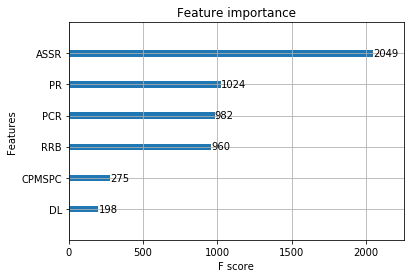

In [15]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(model)
pyplot.show()

In [16]:
print(model.feature_importances_)

[0.05010933 0.         0.37336007 0.03607872 0.18658893 0.17893586
 0.17492712]


In [17]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, predictions, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9800787250384024
recall: 0.9801171368677088
fscore: 0.97999991999968
support: None


In [18]:
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC
grd_clf= GradientBoostingClassifier()
svm_clf = SVC()

In [19]:
from sklearn.metrics import accuracy_score
# for clf in (grd_clf, svm_clf):
grd_clf.fit(X_train, y_train)
y_pred_gbdt = grd_clf.predict(X_test)
print(grd_clf.__class__.__name__, accuracy_score(y_test, y_pred_gbdt))
precision1, recall1, fscore1, support1 = score(y_test, y_pred_gbdt, average='macro')
print('precision: {}'.format(precision1))
print('recall: {}'.format(recall1))
print('fscore: {}'.format(fscore1))
    
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print(svm_clf.__class__.__name__, accuracy_score(y_test, y_pred_svm))
precision2, recall2, fscore2, support2 = score(y_test, y_pred_svm, average='macro')
print('precision: {}'.format(precision2))
print('recall: {}'.format(recall2))
print('fscore: {}'.format(fscore2))

GradientBoostingClassifier 0.979
precision: 0.9791079107910792
recall: 0.9791289945752188
fscore: 0.978999978999979
SVC 0.978
precision: 0.9780785970302099
recall: 0.978116848826231
fscore: 0.977999911999648


In [20]:
importances=grd_clf.feature_importances_

In [21]:
importances

array([0.01559023, 0.        , 0.36772616, 0.00884426, 0.4479783 ,
       0.03046094, 0.12940011])

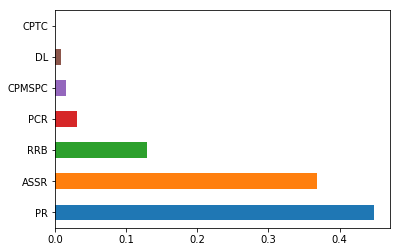

In [22]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(importances, index=oj_data.iloc[:, 0:7].columns)
feat_importances.nlargest(7).plot(kind='barh')

0.9801171368677088
0.9791289945752186
0.978116848826231


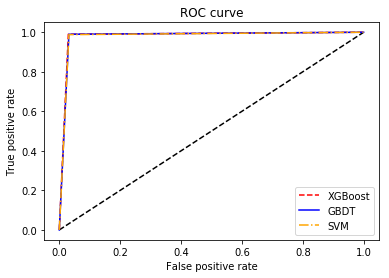

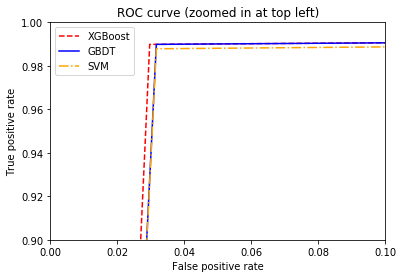

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, predictions)
fpr_gbdt, tpr_gbdt, _ = roc_curve(y_test, y_pred_gbdt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

print(auc(fpr_xgb, tpr_xgb))
print(auc(fpr_gbdt, tpr_gbdt))
print(auc(fpr_svm, tpr_svm))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', color='r', linestyle='--')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBDT', color='b', linestyle='-')
plt.plot(fpr_svm, tpr_svm, label='SVM', color='orange', linestyle='-.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.1)
plt.ylim(0.9, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost', color='r', linestyle='--')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBDT', color='b', linestyle='-')
plt.plot(fpr_svm, tpr_svm, label='SVM', color='orange', linestyle='-.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [12]:
draw_data=oj_data.iloc[:, 0:7]

In [13]:
print(draw_data.shape)
draw_data.head()

(22842, 7)


,CPMSPC,CPTC,ASSR,DL,PR,PCR,RRB
0,2,1,0.882609,1,1.0,0.631714,163
1,2,1,0.627778,1,1.0,0.631714,163
2,4,1,0.775883,1,0.0,0.813397,188
3,3,1,0.932974,1,1.0,0.703248,169
4,3,1,0.888374,1,1.0,0.586463,128


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(draw_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, oj_data[['LABEL']]], axis = 1)

In [16]:
finalDf.shape

(22842, 3)

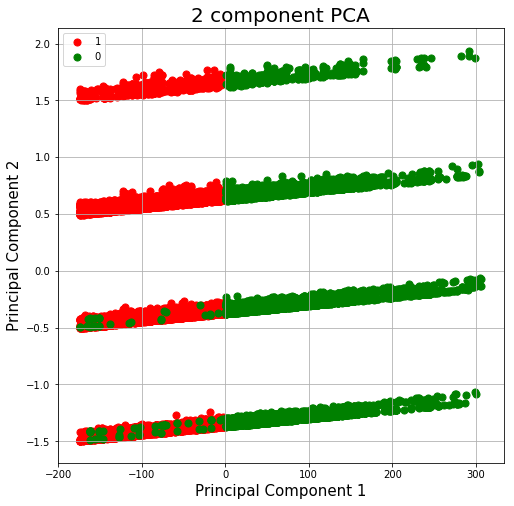

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['LABEL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [19]:
pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(draw_data)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [20]:
principalDf1.shape

(22842, 3)

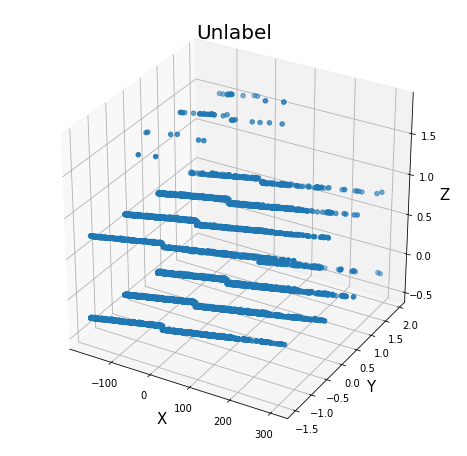

In [21]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fig = pyplot.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)

ax.scatter(principalDf1['principal component 1'], principalDf1['principal component 2'], principalDf1['principal component 3'])
ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_zlabel('Z', fontsize = 15)
ax.set_title('Unlabel', fontsize = 20)
pyplot.show()

In [22]:
finalDf1 = pd.concat([principalDf1, oj_data[['LABEL']]], axis = 1)

In [23]:
finalDf1.shape

(22842, 4)

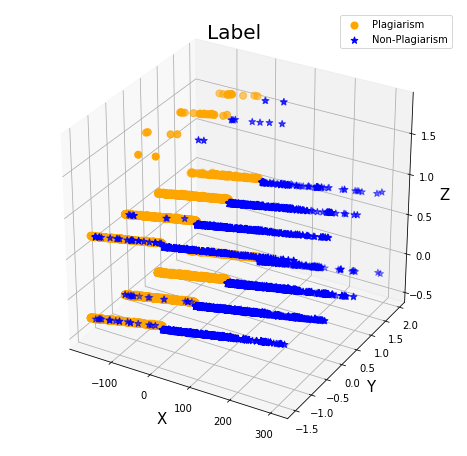

In [24]:
fig = pyplot.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

targets = [1, 0]
targets_mapping = ['Plagiarism', 'Non-Plagiarism']
colors = ['orange', 'b']
markers = ['o', '*']
for target, color, marker in zip(targets,colors, markers):
    indicesToKeep = finalDf1['LABEL'] == target
    ax.scatter(finalDf1.loc[indicesToKeep, 'principal component 1']
               , finalDf1.loc[indicesToKeep, 'principal component 2']
               , finalDf1.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker = marker
               , s = 50)
ax.legend(targets_mapping)

ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_zlabel('Z', fontsize = 15)
ax.set_title('Label', fontsize = 20)
pyplot.show()